In [16]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

### Let's try to compute AND operation using Mathematical function

<img src="nn_and.PNG" width="50%" height="50%">
<p> Credits: Andrew NG Machine Learning </p>

In [17]:
def hypothesis_function(x1,x2):
    return -30 + x1 * 20 + 20 * x2

def sigmoid_function(x):
    return 1/(1 + math.exp(-1 * x))

In [18]:
print("x1 = 0 and x2 = 0")
round(sigmoid_function(hypothesis_function(0,0)))

x1 = 0 and x2 = 0


0

In [19]:
print("x1 = 0 amd x2 = 1")
round(sigmoid_function(hypothesis_function(0,1)))

x1 = 0 amd x2 = 1


0

In [20]:
print("x1 = 1 amd x2 = 0")
round(sigmoid_function(hypothesis_function(1,0)))

x1 = 1 amd x2 = 0


0

In [21]:
print("x1 = 1 amd x2 = 1")
round(sigmoid_function(hypothesis_function(1,1)))

x1 = 1 amd x2 = 1


1

### As you have seen above the mathematical function was able to compute and function
### Let's try to implement a Simple Neural Network with out a hidden layer and check it it's able to compute a AND function by adjusting the weights automatically

#### We will create a neural network with
- 2 inputs layers
- 0 hidden layers
- 1 output layer

In [22]:
#x inputs
X = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])

#x output
y_output = np.array([0.0,0.0,0.0,1.0])

In [23]:
print("============input==========")
print(X)

print("===========output==========")
print(y_output)

============input==========
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
===========output==========
[0. 0. 0. 1.]


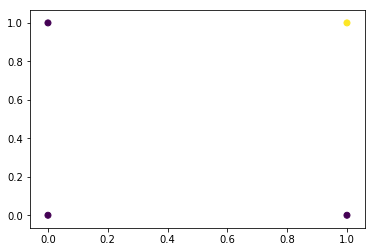

In [24]:
plt.scatter(X[:,0],X[:,1],c=y_output,label=['zero','one'])
plt.show()

In [25]:
#instead of using sigmoid we can use check function as well
def check(x):
    return tf.to_float(tf.greater(x,0.5))

In [38]:
sess = tf.Session()

#Let's call weights of the input layer w and bias be b
X = tf.convert_to_tensor(X, dtype=tf.float32)
y_output = tf.reshape(tf.convert_to_tensor(y_output, dtype=tf.float32), [4,1])
w = tf.Variable(tf.random_normal([2, 1]), dtype=tf.float32,name="weights")
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32,name="bias")

#output
output = tf.sigmoid(tf.add(tf.matmul(X,w),b))
error = tf.subtract(y_output, output)
mse = tf.reduce_mean(tf.square(error))
delta = tf.matmul(tf.transpose(X), error)
adder = tf.add(w, delta)
train = tf.assign(w, adder)


sess.run(tf.global_variables_initializer())

In [39]:
#err, target = 1, 0
epoch, max_epochs = 0, 100

while epoch < max_epochs:
    epoch += 1
    err, _ = sess.run([mse, train])
print('epoch:', epoch, 'mse:', err)

Weights = np.array(sess.run(w))
bias = np.array(sess.run(b))

print(Weights)
print(bias)

epoch: 100 mse: 0.12610833
[[0.88102305]
 [0.8810232 ]]
[-1.3215346]


In [40]:
X_input = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])

def sigmoid_function(x):
    return 1/(1 + np.exp(-1 * x))

np.round(sigmoid_function(np.matmul(X_input,Weights) + bias))

array([[0.],
       [0.],
       [0.],
       [1.]])

In [41]:
sess.close()

### Next we will try to implement the above code using cost and optimizers